<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/5-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

wine=pd.read_csv('https://bit.ly/wine_csv_data')
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(data,target,test_size=0.2,random_state=42)

In [ ]:
sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [ ]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=42)
dt.fit(sub_input,sub_target)

print(dt.score(sub_input,sub_target))
print(dt.score(val_input,val_target))

0.9971133028626413
0.864423076923077


###교차검증

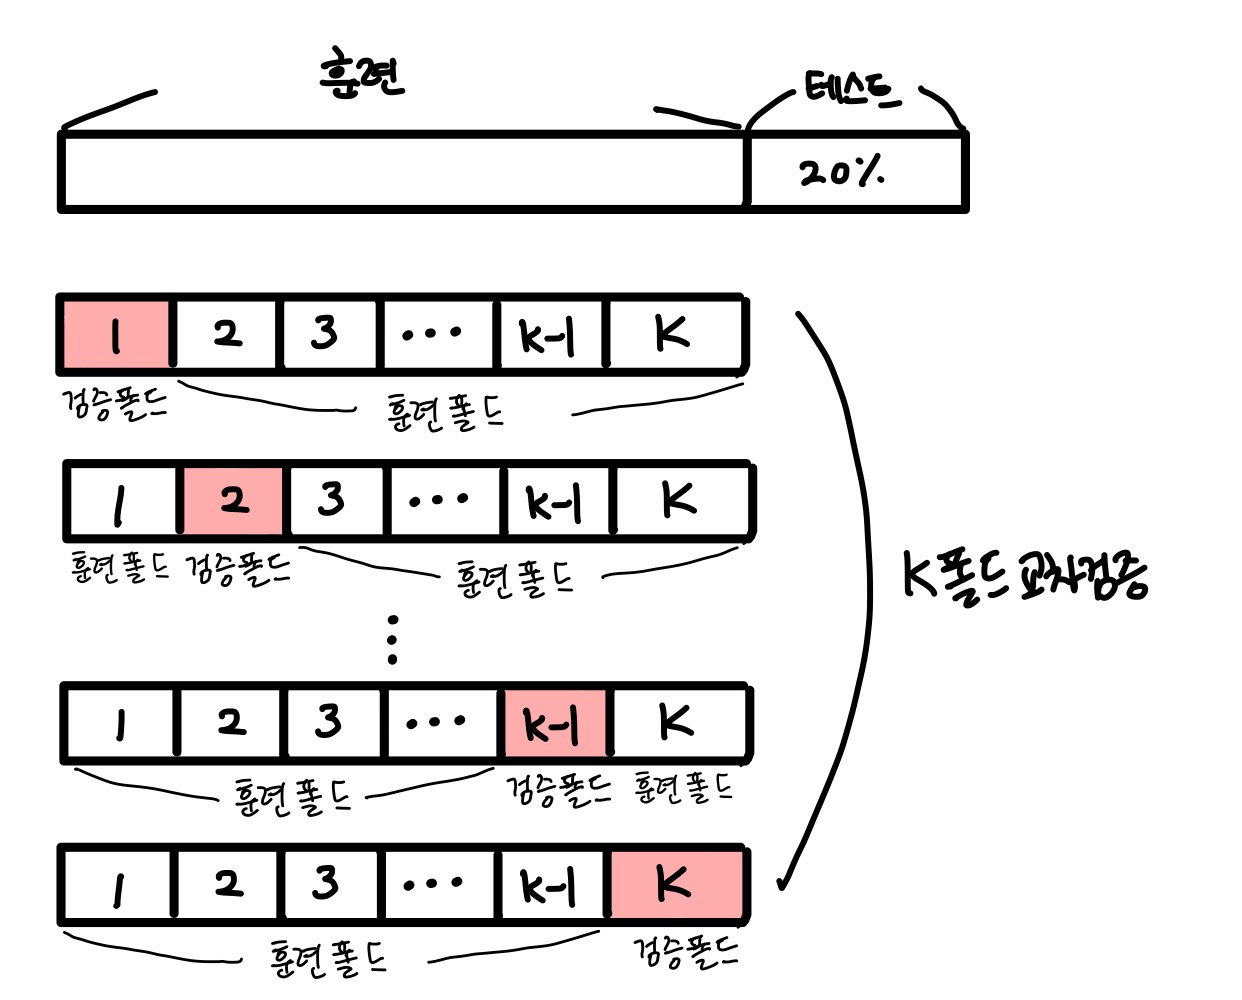
### 검증할 것을 뽑는다. 우리는 이것을 K-폴드 교차검증이라 한다

In [ ]:
from sklearn.model_selection import cross_validate

scores=cross_validate(dt,train_input,train_target)
print(scores)

{'fit_time': array([0.01143956, 0.0101912 , 0.01103163, 0.01058316, 0.01021504]), 'score_time': array([0.00173521, 0.00407648, 0.00176239, 0.00182033, 0.00173521]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
from sklearn.model_selection import StratifiedKFold

scores=cross_validate(dt,train_input,train_target,cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
splitter=StratifiedKFold(n_splits=10,shuffle=True,random_state=42) # n_splits몇폴드 교차검증할건지
scores=cross_validate(dt,train_input,train_target,cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


###하이퍼파라미터 튜닝
 * 테스트 세트 없이 교차검증만으로 **최적의 모델 찾기**
###그리드 서치
 * 하이퍼파라미터란
1.   파라미터의 파라미터
2.   사용자 지정 파라미터

 * 하이퍼파라미터 튜닝?
  * 데이터마다 좋은 입력값 설정하는 노가다작업
  * 이거 힘들어서 그리드 서치
 * 파라미터 탐색
1.   탐색할 파라미터 지정
2.   그리드 서치 수행해서 최상의 평균검증점수 나오는 파라미터 조합 찾기
3.   그리드 서치는 최상의 파라미터에서 전체훈련세트를 사용해 최종 모델을 훈련







In [ ]:
from sklearn.model_selection import GridSearchCV

params={'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005]}
gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
dt=gs.best_estimator_
print(dt.score(train_input,train_target))

0.9615162593804117


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [ ]:
best_index=np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [ ]:
params={'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
          'max_depth': range(5,20,1),
          'min_samples_split': range(2,100,10)
          }

In [ ]:
gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


###랜덤 섳잉
 * 언제 사용하는지
    * 파라미터 값이 수치일 때 값 범위나간격 미리 정하기 어려울 수 있음
    * 많은 파라미터 조건
 * 함수
    * radint 정수로 숫자 뽑음
    * uniform 실수로 숫자를 뽑음

In [ ]:
from scipy.stats import uniform,randint
rgen=randint(0, 10)
rgen.rvs(10)

array([4, 6, 1, 8, 4, 9, 6, 4, 8, 1])

In [ ]:
np.unique(rgen.rvs(1000),return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 96,  84, 100, 107, 103,  95, 110, 110, 104,  91]))

In [ ]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.1281273 , 0.00091141, 0.20490438, 0.45036872, 0.45600906,
       0.42006511, 0.81490123, 0.61336373, 0.39116944, 0.44571996])

In [ ]:
params={'min_impurity_decrease':uniform(0.0001,0.001), # 파라미터를 dictionary형식으로 설정
          'max_depth':randint(20,50),
          'min_samples_split':randint(2,25),
          'min_samples_leaf':randint(1,25),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gs=RandomizedSearchCV(DecisionTreeClassifier(random_state=42),params,n_iter=100,n_jobs=-1,random_state=42) # n_iter로 샘플링 횟수 지정 가능
gs.fit(train_input,train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe464e726a0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fe464f177c0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe464e72970>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe4650a3cd0>},
                   random_state=42)

In [ ]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [ ]:
dt=gs.best_estimator_

print(dt.score(test_input,test_target))

0.86


In [ ]:
gs=RandomizedSearchCV(DecisionTreeClassifier(splitter='random',random_state=42),params,n_iter=100,n_jobs=-1,random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe464e726a0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fe464f177c0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe464e72970>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe4650a3cd0>},
                   random_state=42)

In [ ]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt=gs.best_estimator_
print(dt.score(test_input,test_target))

{'max_depth': 43, 'min_impurity_decrease': 0.00011407982271508446, 'min_samples_leaf': 19, 'min_samples_split': 18}
0.8458726956392981
0.786923076923077
